In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 

1. Когортный анализ по user_id

In [2]:
data=pd.read_excel('когортный анализ.xlsx')

In [71]:
data.head(50)

,user_id,date,price,month_year,cohort_index
0,A0005,2020-03-25,50,2020-03-01,1
1,A0005,2020-03-25,40,2020-03-01,1
2,A0005,2020-03-26,70,2020-03-01,1
3,A0005,2020-03-27,20,2020-03-01,1
4,A0005,2020-03-29,50,2020-03-01,1
5,A0005,2020-03-31,50,2020-03-01,1
6,A0005,2020-03-31,40,2020-03-01,1
7,A0005,2020-04-01,100,2020-04-01,1
8,A0005,2020-04-02,40,2020-04-01,1
9,A0005,2020-04-04,70,2020-04-01,1


In [5]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)

In [6]:
data['month_year']=data['date'].apply(get_month)

In [7]:
data.head()

,user_id,date,price,month_year
0,A0005,2020-03-25,50,2020-03-01
1,A0005,2020-03-25,40,2020-03-01
2,A0005,2020-03-26,70,2020-03-01
3,A0005,2020-03-27,20,2020-03-01
4,A0005,2020-03-29,50,2020-03-01


In [8]:
data['cohortMonth']=data.groupby('user_id')['month_year'].transform('min')

In [14]:
def get_date(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year,month,day

In [15]:
date_year,date_month,_=get_date(data,'date')

In [16]:
cohort_year,cohort_month,_=get_date(data,'cohortMonth')

In [17]:
year_diff=date_year-cohort_year

In [18]:
month_diff=date_month-cohort_month

In [19]:
data['cohort_index']=year_diff*12+month_diff+1

In [20]:
data.head()

,user_id,date,price,month_year,cohortMonth,cohort_index
0,A0005,2020-03-25,50,2020-03-01,2020-03-01,1
1,A0005,2020-03-25,40,2020-03-01,2020-03-01,1
2,A0005,2020-03-26,70,2020-03-01,2020-03-01,1
3,A0005,2020-03-27,20,2020-03-01,2020-03-01,1
4,A0005,2020-03-29,50,2020-03-01,2020-03-01,1


In [21]:
data['cohort_index'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 12, 10,  9, 11, 13, 14],
      dtype=int64)

In [22]:
data1=data.pivot_table(index='cohortMonth',
                      columns='cohort_index',
                      values='user_id',
                      aggfunc=len)

In [23]:
data1

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,9994.0,8175.0,7099.0,6637.0,6171.0,5127.0,4657.0,4278.0,4110.0,4240.0,3831.0,3791.0,3632.0,761.0
2020-02-01,8463.0,8013.0,5565.0,5593.0,4952.0,4184.0,3293.0,2876.0,2633.0,2172.0,1930.0,1595.0,309.0,NaN
2020-03-01,13210.0,9779.0,8148.0,7837.0,7410.0,6000.0,5634.0,5009.0,4595.0,4604.0,4414.0,899.0,NaN,NaN
2020-04-01,10123.0,8725.0,6272.0,6019.0,5769.0,4106.0,3699.0,3356.0,3358.0,3158.0,605.0,NaN,NaN,NaN
2020-05-01,14982.0,10806.0,8616.0,8336.0,7728.0,6609.0,5956.0,5811.0,5598.0,1137.0,NaN,NaN,NaN,NaN
2020-06-01,11304.0,9783.0,6793.0,6603.0,6294.0,5182.0,4710.0,4241.0,808.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,17007.0,11428.0,8432.0,8273.0,7204.0,6673.0,6218.0,1224.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,13458.0,10518.0,7241.0,7070.0,6935.0,5753.0,1038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,17781.0,12152.0,8846.0,8656.0,7829.0,1493.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
first_column=data1.iloc[:,0]

In [25]:
retention=data1.div(first_column,axis=0)

In [26]:
retention.round(2)

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1.0,0.82,0.71,0.66,0.62,0.51,0.47,0.43,0.41,0.42,0.38,0.38,0.36,0.08
2020-02-01,1.0,0.95,0.66,0.66,0.59,0.49,0.39,0.34,0.31,0.26,0.23,0.19,0.04,NaN
2020-03-01,1.0,0.74,0.62,0.59,0.56,0.45,0.43,0.38,0.35,0.35,0.33,0.07,NaN,NaN
2020-04-01,1.0,0.86,0.62,0.59,0.57,0.41,0.37,0.33,0.33,0.31,0.06,NaN,NaN,NaN
2020-05-01,1.0,0.72,0.58,0.56,0.52,0.44,0.40,0.39,0.37,0.08,NaN,NaN,NaN,NaN
2020-06-01,1.0,0.87,0.60,0.58,0.56,0.46,0.42,0.38,0.07,NaN,NaN,NaN,NaN,NaN
2020-07-01,1.0,0.67,0.50,0.49,0.42,0.39,0.37,0.07,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1.0,0.78,0.54,0.53,0.52,0.43,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1.0,0.68,0.50,0.49,0.44,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


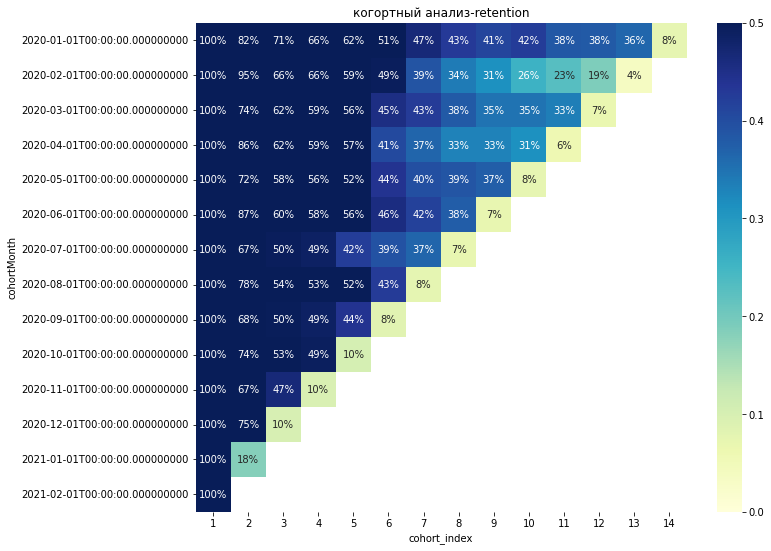

In [27]:
plt.figure(figsize=(11,9))
plt.title('когортный анализ-retention')
sns.heatmap(data=retention,
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap="YlGnBu")
plt.show()

2. Когортный анализ по сумме покупок 

In [89]:
data=pd.read_excel('когортный анализ.xlsx')

In [90]:
data.head()

,user_id,date,price
0,A0005,2020-03-25,50
1,A0005,2020-03-25,40
2,A0005,2020-03-26,70
3,A0005,2020-03-27,20
4,A0005,2020-03-29,50


In [91]:
data['month_year']=data['date'].apply(get_month)

In [92]:
data.head(50)

,user_id,date,price,month_year
0,A0005,2020-03-25,50,2020-03-01
1,A0005,2020-03-25,40,2020-03-01
2,A0005,2020-03-26,70,2020-03-01
3,A0005,2020-03-27,20,2020-03-01
4,A0005,2020-03-29,50,2020-03-01
5,A0005,2020-03-31,50,2020-03-01
6,A0005,2020-03-31,40,2020-03-01
7,A0005,2020-04-01,100,2020-04-01
8,A0005,2020-04-02,40,2020-04-01
9,A0005,2020-04-04,70,2020-04-01


In [93]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)

In [94]:
data['cohortPrice']=data.groupby('user_id')['month_year'].transform('max')

In [95]:
def get_date(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year,month,day

In [96]:
date_year,date_month,_=get_date(data,'date')
cohort_year,cohort_month,_=get_date(data,'cohortPrice')
year_diff=date_year-cohort_year
month_diff=date_month-cohort_month
data['cohort_index']=year_diff*12+month_diff+1

In [97]:
data['cohort_index'].unique()

array([  0,   1,  -3,  -2,  -1,  -4,  -6,  -5, -10,  -8,  -7, -12, -11,
        -9], dtype=int64)

In [98]:
data1=data.pivot_table(index='cohortPrice',
                      columns='cohort_index',
                      values='user_id',
                      aggfunc=len)

In [83]:
data1

cohort_index,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1
cohortPrice,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4429.0
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1372.0,4924.0
2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,1760.0,7857.0
2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,367.0,2455.0,6469.0
2020-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,756.0,1174.0,1535.0,3484.0,10234.0
2020-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335.0,1325.0,1746.0,1712.0,4244.0,8805.0
2020-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,846.0,1990.0,2359.0,2622.0,4774.0,12881.0
2020-08-01,NaN,NaN,NaN,NaN,NaN,NaN,107.0,369.0,865.0,2038.0,2639.0,2751.0,5751.0,11097.0
2020-09-01,NaN,NaN,NaN,NaN,NaN,19.0,129.0,591.0,1321.0,2538.0,2855.0,3275.0,6056.0,14240.0


In [101]:
last_column=data1.iloc[:,-1]
retention=data1.div(last_column,axis=0)
retention.round(2)

cohort_index,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1
cohortPrice,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.28,1.0
2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.22,1.0
2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.06,0.38,1.0
2020-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,0.11,0.15,0.34,1.0
2020-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.15,0.20,0.19,0.48,1.0
2020-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.07,0.15,0.18,0.20,0.37,1.0
2020-08-01,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.03,0.08,0.18,0.24,0.25,0.52,1.0
2020-09-01,NaN,NaN,NaN,NaN,NaN,0.00,0.01,0.04,0.09,0.18,0.20,0.23,0.43,1.0


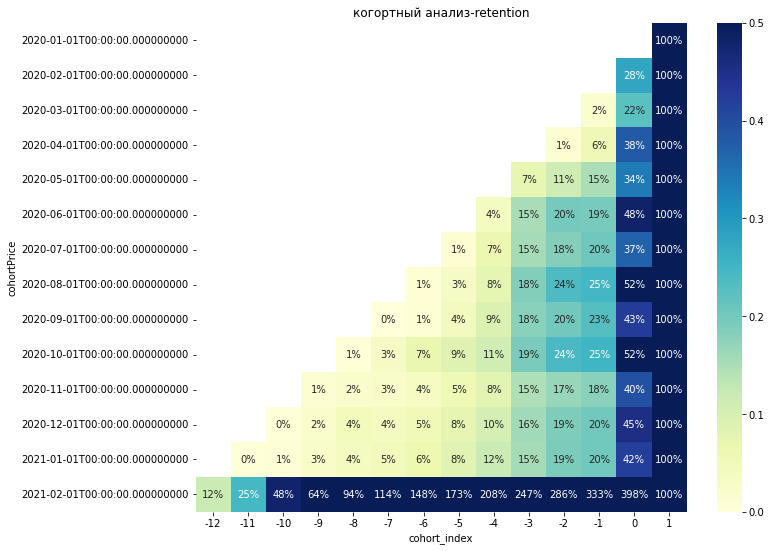

In [102]:
plt.figure(figsize=(11,9))
plt.title('когортный анализ-retention')
sns.heatmap(data=retention,
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap="YlGnBu")
plt.show()

Вывод по когортному анадизу для количества покупателей (user id);
для сумм их покупок. (Проанализируйте получившиеся графики и опишите результат. Что необычного вы заметили? Есть ли выбивающиеся когорты? У каких когорт лучшая возвращаемость клиентов, а у каких худшая? Что стоило бы ещё исследовать внимательнее на других данных?)


По Когортному анализу по месяцу привлечения - вывод - за последние 3 месяца стало меньше покупателей возвращаться за повторной покупкой. 

По Когортному анализу по месяцу привлечения - вывод - за последние 3 месяца сумма покупики стала увеличиваться
Причем - в последний месяц эта сумма драмматически высока.